<div style='width=100%'><img  src=https://universidadeuropea.com/resources/media/images/universidad-europea-logo_poc9mEM.original.png width=200></div>

<div style='margin:auto;text-align: center;font-family: "Times New Roman", Times, serif; font-weight: bold;'>INTELIGENCIA ARTIFICIAL<br><br>Actividad 2 - WebScrapping + Twitter</div>

<div style='width:100%; display:flex;flex-direction:row'>
    <div style='width:50%;margin-right:5cm;'>
        <p style='font-family: "Times New Roman", Times, serif; font-weight: bold;'>ESTUDIANTES</p>
<ul style='font-family: "Times New Roman", Times, serif;'>
    <li>Adilem Dobras 21911633</li><li>Alvaro Martinez</li></ul> </div>

</div>

<div style='font-family: "Times New Roman", Times, serif;text-align: justify; '><h2>1. Seccion WebScrapping y Selenium</h2>
<p>En este apartado realizaremos el webscrapping de la pagina web:   . Nosotros hemos elegido investigar sobre Genshin Impact. Genshin 
    Impact es un videojuego de pc muy popular entre las personas de 18-30 años en el que te da la capacidad de movilizarte por un mundo virtual
    e ir desbloqueado personajes, espadas y elementos para poder mejorar niveles y mas. En nuestro scrap extraeremos informacion de los personajes, armas, equipamiento, entre otros; para posterior introducirlo en un pandas.</p></div>

<h3 style='font-family: "Times New Roman", Times, serif; color:#7BAEEF;letter-spacing:2px;'>1.1 Librerias</h3>

In [ ]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import requests
import csv
import pandas as pd
from pymongo import MongoClient
import json

<h3 style='font-family: "Times New Roman", Times, serif; color:#7BAEEF;letter-spacing:2px;'>1.2 Codigo</h3>

<p style='font-family: "Times New Roman", Times, serif;'>Para realizar el codigo se nos solicito que utilizaramos una bases de datos no relacional
por lo que nosotros decidimos seleccionar MongoDB</p>

In [ ]:
client = MongoClient('localhost', 27017)
db = client ['Genshin']
armas = db ['armas']
personajes=db["personajes"]


urlindex=("https://genshin-impact.fandom.com")

In [ ]:

def obtenerweapons():
#Scraping the data from the website and storing it in the database.

    urlarmas=urlindex+"/es/wiki/Armas"
    page = requests.get(urlarmas)
    soup = BeautifulSoup(page.content, 'html.parser')
    tablatiposarmas=soup.findAll("table",class_="wikitable")
    listalinksini=tablatiposarmas[0].find_all("a")
    listalinks=[]
    tipo=[]
    #obtienes los links de los distintos tipos 
    for x in listalinksini:
        listalinks.append(urlindex+x["href"])
        tipo.append(x.getText())


    armasarray={}
    armasarray["arma"]=[]
    
    armaslinks=[]
 
    
    #recorriendo las distintas categorias
    for tp in listalinks:
        pagetipo=requests.get(tp)
        souptipo=BeautifulSoup(pagetipo.content,"html.parser")
        cartasArmas=souptipo.findAll("ul",class_="itemboxes-container")
        cartasArmas=cartasArmas[1]
        cartasArmas=cartasArmas.findAll("span",class_="card-link")
        

        for arma in cartasArmas:
            buff=arma.find_all("a")
            for bufc in buff:
                armaslinks.append(urlindex+bufc["href"])
    print (armaslinks)
    
    for armalink in armaslinks:
        pagearm=requests.get(armalink)
        souparm=BeautifulSoup(pagearm.content,"html.parser")
        name=""
        tipo=""
        rareza=""
        dmg=""
        
        namescraped=souparm.find("h2",class_="pi-item pi-item-spacing pi-title pi-secondary-background")
        print (namescraped.getText())
        tipoA=souparm.find("div",{"data-source":"tipo"})
        tipoA=tipoA.find("div")
        tipo=tipoA.getText()
        print(tipo)
        rarezaA=souparm.find("div",{"data-source":"rareza"})
        rarezaA=rarezaA.find("div")
        rareza=rarezaA.getText()
        print(rareza)
        imagenA=souparm.find("figure",class_="pi-item pi-image")


        armasarray["arma"].append({

            'nombre': namescraped.getText(),
            'tipo': tipo,
            "rareza": rareza,

    })

    armas.insert_many(armasarray)
    return 0

In [ ]:
def obtenerpersonajes():


    #obtengo los personajes y los distintos datos sobre estos

    urlpersonajes=urlindex+"/es/wiki/Personajes"
    print(urlpersonajes)
    page = requests.get(urlpersonajes)
    soup = BeautifulSoup(page.content, 'html.parser')
    tablas=soup.findAll("table",class_="wikitable")
    tablapersonajes=tablas[1]

    Pesronajesarray={}
    Pesronajesarray["Personaje"]=[]
    fila=tablapersonajes.findAll("tr")
    for F in fila:
        bufA=F.findAll("td")
        if(len(bufA)!=0):
            #obtengo el nombre
            nombrepersonaje=bufA[0].findAll("a")
            nombrepersonaje=nombrepersonaje[1].getText()
            print(nombrepersonaje)
            #obtengo la rareza
            rarezapersonaje=bufA[1].getText()
            print(rarezapersonaje)
            #obtengo el elemento
            elementopersonaje=bufA[2].getText()
            print(elementopersonaje)
            #obtengo el arma
            armapersonaje=bufA[3].getText()
            print(armapersonaje)
            #obtengo el genero del personaje
            sexo=bufA[4].getText()
            print(sexo)
            #obtengo la region de la que procede
            procedencia=bufA[5].getText()
            print(procedencia)
            Pesronajesarray["Personaje"].append({

                "nombre":nombrepersonaje,
                "rareza":rarezapersonaje,
                "elemento":elementopersonaje,
                "arma":armapersonaje,
                "sexo":sexo,
                "procedendia":procedencia,

            })

    

    
    
    personajes.insert_many(Pesronajesarray)

    return Pesronajesarray
    




In [ ]:
obtenerweapons()

obtenerpersonajes()

In [ ]:

urlindex=("https://genshin-impact.fandom.com")

def obtenerweapons():
    urlarmas=urlindex+"/es/wiki/Armas"
    page = requests.get(urlarmas)
    soup = BeautifulSoup(page.content, 'html.parser')
    tablatiposarmas=soup.findAll("table",class_="wikitable")
    listalinksini=tablatiposarmas[0].find_all("a")
    listalinks=[]
    tipo=[]
    for x in listalinksini:
        listalinks.append(urlindex+x["href"])
        tipo.append(x.getText())
    #print (tipo)
    #print (listalinks)

    armasarray={}
    armasarray["arma"]=[]
    
    armaslinks=[]
 
    

    for tp in listalinks:
        pagetipo=requests.get(tp)
        souptipo=BeautifulSoup(pagetipo.content,"html.parser")
        cartasArmas=souptipo.findAll("ul",class_="itemboxes-container")
        cartasArmas=cartasArmas[1]
        cartasArmas=cartasArmas.findAll("span",class_="card-link")
        

        for arma in cartasArmas:
            buff=arma.find_all("a")
            for bufc in buff:
                armaslinks.append(urlindex+bufc["href"])
    print (armaslinks)

    for armalink in armaslinks:
        pagearm=requests.get(armalink)
        souparm=BeautifulSoup(pagearm.content,"html.parser")
        name=""
        tipo=""
        rareza=""
        dmg=""
        
        namescraped=souparm.find("h2",class_="pi-item pi-item-spacing pi-title pi-secondary-background")
        print (namescraped.getText())
        tipoA=souparm.find("div",{"data-source":"tipo"})
        tipoA=tipoA.find("div")
        tipo=tipoA.getText()
        print(tipo)
        rarezaA=souparm.find("div",{"data-source":"rareza"})
        rarezaA=rarezaA.find("div")
        rareza=rarezaA.getText()
        print(rareza)
        imagenA=souparm.find("figure",class_="pi-item pi-image")


        armasarray["arma"].append({

            'nombre': namescraped.getText(),
            'tipo': tipo,
            "rareza": rareza,

    })

    armas.insert_many(armasarray)
    return 0

def obtenerpersonajes():

    urlpersonajes=urlindex+"/es/wiki/Personajes"
    print(urlpersonajes)
    page = requests.get(urlpersonajes)
    soup = BeautifulSoup(page.content, 'html.parser')
    tablas=soup.findAll("table",class_="wikitable")
    tablapersonajes=tablas[1]

    Pesronajesarray={}
    Pesronajesarray["Personaje"]=[]
    fila=tablapersonajes.findAll("tr")
    for F in fila:
        bufA=F.findAll("td")
        if(len(bufA)!=0):
            nombrepersonaje=bufA[0].findAll("a")
            nombrepersonaje=nombrepersonaje[1].getText()
            print(nombrepersonaje)
            rarezapersonaje=bufA[1].getText()
            print(rarezapersonaje)
            elementopersonaje=bufA[2].getText()
            print(elementopersonaje)
            armapersonaje=bufA[3].getText()
            print(armapersonaje)
            sexo=bufA[4].getText()
            print(sexo)
            procedencia=bufA[5].getText()
            print(procedencia)
            Pesronajesarray["Personaje"].append({

                "nombre":nombrepersonaje,
                "rareza":rarezapersonaje,
                "elemento":elementopersonaje,
                "arma":armapersonaje,
                "sexo":sexo,
                "procedendia":procedencia,

            })

    

    
    
    personajes.insert_many(Pesronajesarray)

    return Pesronajesarray
    


obtenerweapons()

obtenerpersonajes()

In [ ]:
enemigos=db["enemigos"]
recursos=["recursos"]
artefactos=db["artefactos"]

urlindex=("https://genshin-impact.fandom.com")

def obtenerweapons():
    urlarmas=urlindex+"/es/wiki/Armas"
    page = requests.get(urlarmas)
    soup = BeautifulSoup(page.content, 'html.parser')
    tablatiposarmas=soup.findAll("table",class_="wikitable")
    listalinksini=tablatiposarmas[0].find_all("a")
    listalinks=[]
    tipo=[]
    for x in listalinksini:
        listalinks.append(urlindex+x["href"])
        tipo.append(x.getText())
    #print (tipo)
    #print (listalinks)

    armasarray={}
    armasarray["arma"]=[]
    
    armaslinks=[]
 
    

    for tp in listalinks:
        pagetipo=requests.get(tp)
        souptipo=BeautifulSoup(pagetipo.content,"html.parser")
        cartasArmas=souptipo.findAll("ul",class_="itemboxes-container")
        cartasArmas=cartasArmas[1]
        cartasArmas=cartasArmas.findAll("span",class_="card-link")
        

        for arma in cartasArmas:
            buff=arma.find_all("a")
            for bufc in buff:
                armaslinks.append(urlindex+bufc["href"])
    print (armaslinks)

    for armalink in armaslinks:
        pagearm=requests.get(armalink)
        souparm=BeautifulSoup(pagearm.content,"html.parser")
        name=""
        tipo=""
        rareza=""
        dmg=""
        
        namescraped=souparm.find("h2",class_="pi-item pi-item-spacing pi-title pi-secondary-background")
        print (namescraped.getText())
        tipoA=souparm.find("div",{"data-source":"tipo"})
        tipoA=tipoA.find("div")
        tipo=tipoA.getText()
        print(tipo)
        rarezaA=souparm.find("div",{"data-source":"rareza"})
        rarezaA=rarezaA.find("div")
        rareza=rarezaA.getText()
        print(rareza)
        imagenA=souparm.find("figure",class_="pi-item pi-image")


        armasarray["arma"].append({

            'nombre': namescraped.getText(),
            'tipo': tipo,
            "rareza": rareza,

    })

    armas.insert_many(armasarray)
    return 0

def obtenerpersonajes():

    urlpersonajes=urlindex+"/es/wiki/Personajes"
    print(urlpersonajes)
    page = requests.get(urlpersonajes)
    soup = BeautifulSoup(page.content, 'html.parser')
    tablas=soup.findAll("table",class_="wikitable")
    tablapersonajes=tablas[1]

    Pesronajesarray={}
    Pesronajesarray["Personaje"]=[]
    fila=tablapersonajes.findAll("tr")
    for F in fila:
        bufA=F.findAll("td")
        if(len(bufA)!=0):
            nombrepersonaje=bufA[0].findAll("a")
            nombrepersonaje=nombrepersonaje[1].getText()
            print(nombrepersonaje)
            rarezapersonaje=bufA[1].getText()
            print(rarezapersonaje)
            elementopersonaje=bufA[2].getText()
            print(elementopersonaje)
            armapersonaje=bufA[3].getText()
            print(armapersonaje)
            sexo=bufA[4].getText()
            print(sexo)
            procedencia=bufA[5].getText()
            print(procedencia)
            Pesronajesarray["Personaje"].append({

                "nombre":nombrepersonaje,
                "rareza":rarezapersonaje,
                "elemento":elementopersonaje,
                "arma":armapersonaje,
                "sexo":sexo,
                "procedendia":procedencia,

            })

    

    
    
    personajes.insert_many(Pesronajesarray)

    return Pesronajesarray
    


obtenerweapons()

obtenerpersonajes()

<div style='font-family: "Times New Roman", Times, serif;text-align: justify; '><h2>2. Seccion Tweepy o Twitter</h2>
<p>En este apartado realizaremos el analisis de tweets de la aplicacion twitter. Recogeremos 100 tweets del tema 'guerra' en una escala temporal que seleccionara el usuario por medio de un input, para despues recolectarlos en un DataFrame que nos permitira realizar graficos del mismo. De los tweets hemos sacado un analisis de emociones en donde evaluamos Polaridad y Subjetividad.La polaridad sera el encargado de decirnos si se trata de un tweet negativo, positivo o neutral. </p></div>

<h3 style='font-family: "Times New Roman", Times, serif; color:#7BAEEF;letter-spacing:2px;'>2.1 Librerias</h3>

In [ ]:
import tweepy as tw
import nltk
import pandas as pd
import tweepy
import re
from textblob import TextBlob, Word, Blobber
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

<h3 style='font-family: "Times New Roman", Times, serif; color:#7BAEEF;letter-spacing:2px;'>2.1 Codigo</h3>

<p  style='font-family: "Times New Roman", Times, serif;text-align: justify; '>Para realizar la conexion con twitter primero se debe utilizar la pagina de developers que ellos proven que es: https://developer.twitter.com/en, al tenerla se debe crear un proyecto en donde se deberá solicitar acceso elevado para poder leer, escribir y otras acciones en twitter. Este proyecto creado te habilita unas keys que te permiten iniciar con esta api.  </p>


In [58]:
CONSUMER_KEY='J0ZmR80iQ7BTaUPUcJneqyFm0'
CONSUMER_SECRET_KEY='4wx0eKkvOgGClJBOsSkE12mOKzarrKm2RH4cl9iwCfwSDdTyYH'
ACCESS_TOKEN='1583413761997684736-U6eYehvzpuV8x2rooysjhv0UiGYxKY'
ACCESS_TOKEN_SECRET='uCVCovy7VxZU41FdpNp16S1QD7G1Zusf4VolMqvd3pMeR'

<p  style='font-family: "Times New Roman", Times, serif;text-align: justify; '>Aqui nos encargaremos de buscar tweets. Verificamos que las llaves son validas. Buscamos Tweets
le indicamos el tema 'guerra', el lenguaje español, la fecha que deseamos y la cantidad de tweets. Al finalizar lo guardamos en un Dataframe</p>

In [59]:
fecha=input('Fecha de Tweets:')
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET_KEY)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth,wait_on_rate_limit=True)
tweets=api.search_tweets(q="guerra", lang="es",result_type=fecha,count=100)
df=pd.DataFrame([tweet.text for tweet in tweets],columns=['Tweets'])
df

Fecha de Tweets:25-12-2021


,Tweets
0,"@Alois_Fisher Siempre tira mierda, no debe que..."
1,RT @descargacultura: ¿Cuál ha sido el saldo en...
2,@dsocialcordoba @MartinLlaryora @MuniCba @raul...
3,RT @CaracasEnPinta0: El Petro le ha dado 2 pat...
4,"@ElensGuitart Si.\nEs curioso, el mismo transt..."
...,...
95,RT @Edugamz: Yo entrando a Twitter y viendo qu...
96,"Oficiales del batallón 1º de Corrientes, en fe..."
97,🇫🇮 | Finlandia construirá un muro fronterizo c...
98,RT @oriolsabata: Concentració a Barcelona sota...


<p  style='font-family: "Times New Roman", Times, serif;text-align: justify; '>Como el tweet viene plagado con caracteres, nombres de usuario e informacion que no nos interesa, lo que realizaremos sera limpiar estos tweets dentro del df</p>

In [60]:
def clean_text(text):
    text=re.sub(r'@[A-Za-z09]+','',text)
    text=re.sub(r'#','',text)
    text=re.sub(r'RT[\s]+','',text)
    text=re.sub(r'https:\/\/?','',text)
    return text
df['Tweets']=df['Tweets'].apply(clean_text)
df.head()

,Tweets
0,"_Fisher Siempre tira mierda, no debe querer a ..."
1,: ¿Cuál ha sido el saldo entre las crisis y at...
2,Veterano?\nGuerra de las Islas Falkland? ...
3,: El Petro le ha dado 2 patadas a la guerra ec...
4,"Si.\nEs curioso, el mismo transtorno que tení..."


<p  style='font-family: "Times New Roman", Times, serif;text-align: justify; '>Con el DataFrame limpio ya podemos realizar nuestro analisis de sentimientos, creamos una funcion que nos muestre la subjetividad y creamos otra funcion que obtenga la polaridad</p>

In [61]:
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity
df['Subjectivity']=df['Tweets'].apply(get_subjectivity)
df['Polarity']=df['Tweets'].apply(get_polarity)
df

,Tweets,Subjectivity,Polarity
0,"_Fisher Siempre tira mierda, no debe querer a ...",0.0,0.0
1,: ¿Cuál ha sido el saldo entre las crisis y at...,0.0,0.0
2,Veterano?\nGuerra de las Islas Falkland? ...,0.0,0.0
3,: El Petro le ha dado 2 patadas a la guerra ec...,0.0,0.0
4,"Si.\nEs curioso, el mismo transtorno que tení...",0.0,0.0
...,...,...,...
95,: Yo entrando a Twitter y viendo que Segunda G...,0.0,0.0
96,"Oficiales del batallón 1º de Corrientes, en fe...",0.0,0.0
97,🇫🇮 | Finlandia construirá un muro fronterizo c...,0.0,0.0
98,": Concentració a Barcelona sota el lema ""Ni un...",0.0,0.0


<p style='font-family: "Times New Roman", Times, serif;text-align: justify; '>Adicional, hemos visto en varios videos tutoriales que se realizan tambien nubes de palabras, asi que tambien hemos incluido una nube de palabras de los tweeets</p>

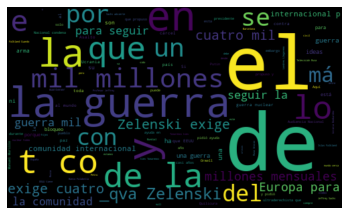

In [62]:
all_words=' '.join([twts for twts in df['Tweets']])
word_Cloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(all_words)
plt.imshow(word_Cloud,interpolation="bilinear")
plt.axis('off')
plt.show()

<p style='font-family: "Times New Roman", Times, serif;text-align: justify; '>Aqui ya empezamos a clasificar si la polaridad es positiva, negativa o neutral, esto se indica viendo si el tweet tiene una polaridad negativa (menor que 0), positiva (mayor que 0) o neutral (0)</p>

In [63]:
def analysis(score):
    if score<0:
        return 'Negativo'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positivo'
df['Analisis']=df['Polarity'].apply(analysis)
df

,Tweets,Subjectivity,Polarity,Analisis
0,"_Fisher Siempre tira mierda, no debe querer a ...",0.0,0.0,Neutral
1,: ¿Cuál ha sido el saldo entre las crisis y at...,0.0,0.0,Neutral
2,Veterano?\nGuerra de las Islas Falkland? ...,0.0,0.0,Neutral
3,: El Petro le ha dado 2 patadas a la guerra ec...,0.0,0.0,Neutral
4,"Si.\nEs curioso, el mismo transtorno que tení...",0.0,0.0,Neutral
...,...,...,...,...
95,: Yo entrando a Twitter y viendo que Segunda G...,0.0,0.0,Neutral
96,"Oficiales del batallón 1º de Corrientes, en fe...",0.0,0.0,Neutral
97,🇫🇮 | Finlandia construirá un muro fronterizo c...,0.0,0.0,Neutral
98,": Concentració a Barcelona sota el lema ""Ni un...",0.0,0.0,Neutral


<p style='font-family: "Times New Roman", Times, serif;text-align: justify; '>A continuacion realizamos un grafico en donde comparamos la polaridad vs la subjetividad. La subjetividad es la valoracion del comentario del usuario.
<br>En este grafico podemos observar la distribucion de ambos.</p>

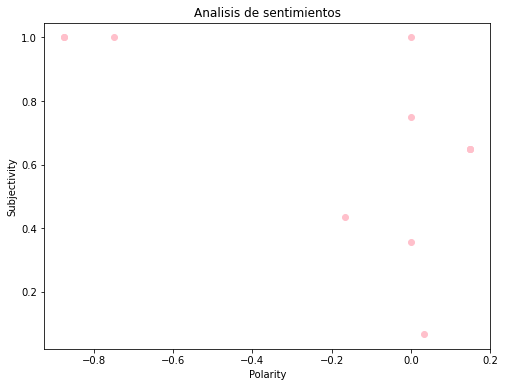

In [55]:
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='pink')
plt.title('Analisis de sentimientos')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

<p style='font-family: "Times New Roman", Times, serif;text-align: justify; '>Tambien realizaremos un histograma para comparar que tipo de comentarios se dieron mas, si fueron negativos, positivos o neutrales.<br>En el tema guerra se encuentran mas comentarios neutrales.</p>

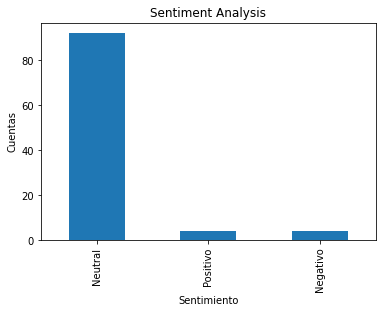

In [56]:
df['Analisis'].value_counts()
plt.title('Sentiment Analysis')
plt.xlabel('Sentimiento')
plt.ylabel('Cuentas')
df['Analisis'].value_counts().plot(kind='bar')
plt.show()